<a href="https://colab.research.google.com/github/shashankbhor/experiments/blob/master/PolyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the data 



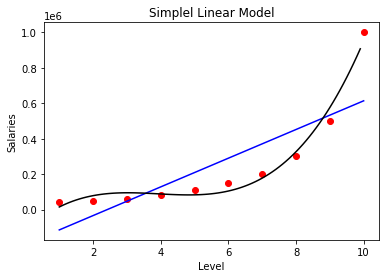

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values

''' In this model we would like NOT to miss any slab of data so not going to split the data'''
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# just for comparison , lets implement linear regression model as well 
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

# Below is Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X)

# Check the x_poly variable - model has created 2 new features based on degree 
# Now need to fit this newly created x_poly into Linearmodel
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

# Visualize prediction of both models 
plt.scatter(X,y,c='red')
''' Graph for Linear '''
plt.plot(X,lin_reg.predict(X),c='blue')

# Below is optional code to smoothen the graph 
x_grid=np.arange(min(X),max(X),0.1)
x_grid=x_grid.reshape(len(x_grid),1) 


''' NOTE THE WAY TO PLOT POLY REGRESSION GRAPH '''
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),c='black')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.title('Polynomial Linear Model')
plt.show()